### Import Libraries

In [17]:
# CS21B2019
# Devarakonda SLR Siddesh
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Reading Image

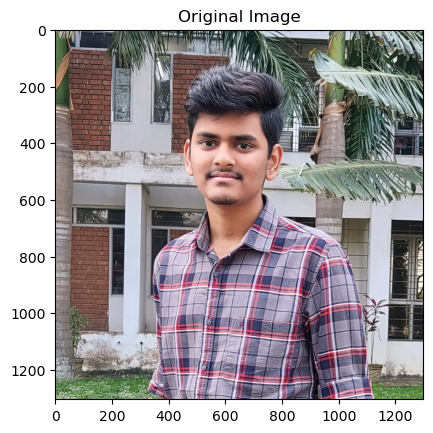

In [18]:
original_image = cv2.imread('images/my-image.jpeg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

## Image Degradation

### 1. Blurring the Image

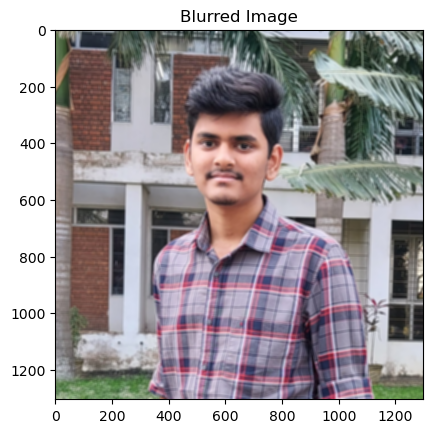

In [19]:
blur_image = cv2.blur(original_image, (10, 10))
plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.show()

### 2. Adding Noise to the Image

In [20]:
mean, std = 0, 180
noise = np.zeros(original_image.shape, np.uint8)
cv2.randn(noise, mean, std)

array([[[ 55,   0,   0],
        [  0,   0,   0],
        [ 61,   0,   0],
        ...,
        [ 16,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [ 85,   0,   0],
        [172,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 90,   0,   0],
        ...,
        [231,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       ...,

       [[  0,   0,   0],
        [ 55,   0,   0],
        [  0,   0,   0],
        ...,
        [ 82,   0,   0],
        [130,   0,   0],
        [ 16,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0],
        ...,
        [ 35,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 63,   0,   0],
        [102,   0,   0],
        ...,
        [  0,   0,   0],
        [ 16,   0,   0],
        [171,   0,   0]]

Text(0.5, 1.0, 'Noisy Image')

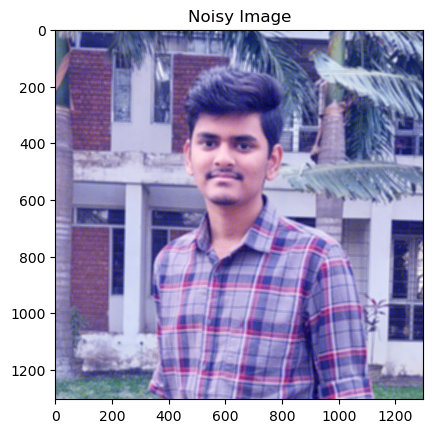

In [21]:
noise_image = cv2.add(blur_image, noise)
plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')

### 3. Compression to jpeg and decompressing around 70-80% quality

In [22]:
#encode and decode jpeg 2000 compression
result, encoded_img = cv2.imencode('.jpg', noise_image, [int(cv2.IMWRITE_JPEG2000_COMPRESSION_X1000), 70])
degraded_img = cv2.imdecode(encoded_img, 1)

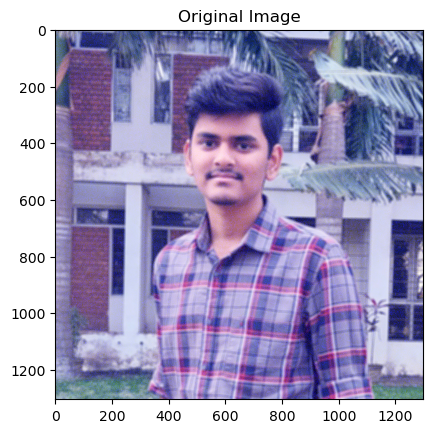

In [23]:
plt.imshow(cv2.cvtColor(degraded_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

## Image Quality Difference

### Finding MSE

In [24]:
mse = np.mean((original_image - degraded_img) ** 2)
print("MSE: ", mse)

MSE:  86.50584235002228


### Finding PSNR

In [25]:
psnr = 10 * np.log10(255.0 ** 2 / mse)
print(f"PSNR: {psnr} dB")

PSNR: 28.760349214413253 dB
